# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- Yeast

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize": (10, 6)})

Some parameters:

In [2]:
ORGANISM_IDS = {559292}
# ORGANISM_IDS = None
SWISSPROT_ONLY = False  # does not make a difference for yeast
MAX_SEQUENCE_EVIDENCE_CODE = 1
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = True  # Does not make a difference for yeast

Creating the dataset:

In [3]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7..."
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...
...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:1901702,salt transmembrane transporter activity
1,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015932,nucleobase-containing compound transmembrane t...
2,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005346,purine ribonucleotide transmembrane transporte...
3,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015605,organophosphate ester transmembrane transporte...
4,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0000295,adenine nucleotide transmembrane transporter a...
...,...,...,...,...,...,...,...,...
7732,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015453,oxidoreduction-driven active transmembrane tra...
7733,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022857,transmembrane transporter activity
7734,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022804,active transmembrane transporter activity
7735,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0004129,cytochrome-c oxidase activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:62031,polar amino acid zwitterion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33579,main group molecular entity
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24431,chemical entity
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:51151,dipolar compound
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
...,...,...,...,...,...,...,...
8098,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:35352,organonitrogen compound
8099,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:36963,organooxygen compound
8100,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33304,chalcogen molecular entity
8101,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:50047,organic amino compound


## Pipeline code

Pipe 4:

In [4]:
from subpred.go_redundancy import subset_pipeline, get_go_id_to_proteins
from subpred.go_redundancy import get_go_subset, get_go_id_to_level
from collections import defaultdict
go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
mechanism_related_terms = {
    "GO:0015291",
    "GO:0015399",
    "GO:0022803",
    "GO:0022804",
    "GO:0015267",
    "GO:0015293",
    "GO:0015297",
    "GO:0140359",
    "GO:0042626",
}

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

pd.DataFrame(sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in optimized_subset]))


coverage          0.980645
mean              0.806333
median            0.872172
std               0.163179
nans              0.000000
subset_length    11.000000
dtype: float64

,0,1
0,amide transmembrane transporter activity,21
1,carbohydrate derivative transmembrane transpor...,25
2,carboxylic acid transmembrane transporter acti...,64
3,monoatomic cation transmembrane transporter ac...,131
4,organophosphate ester transmembrane transporte...,22
5,passive transmembrane transporter activity,32
6,primary active transmembrane transporter activity,61
7,protein transmembrane transporter activity,21
8,salt transmembrane transporter activity,72
9,secondary active transmembrane transporter act...,80


what were the scores before optimization?

In [5]:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    min_unique_samples_per_term=10,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True
)
scores_before

coverage           1.000000
mean               0.857307
median             0.899534
std                0.138239
nans             244.000000
subset_length     36.000000
dtype: float64

How many GO terms before filtering for 20 annotated proteins or more?

In [6]:

len(get_go_subset(
    df_uniprot_goa, root_node="GO:0022857", min_samples=None, excluded_terms=None
))

287

What is the distribution of levels among the 36 GO terms? And among the other terms with less then 20 samples?

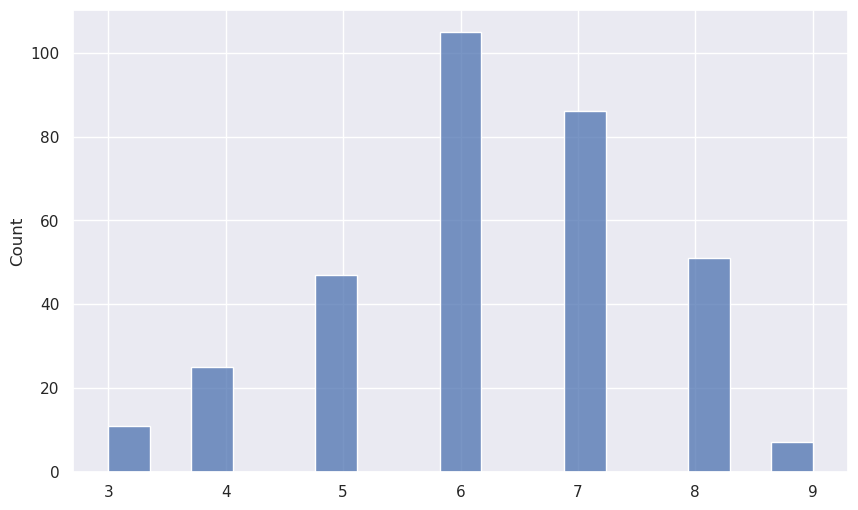

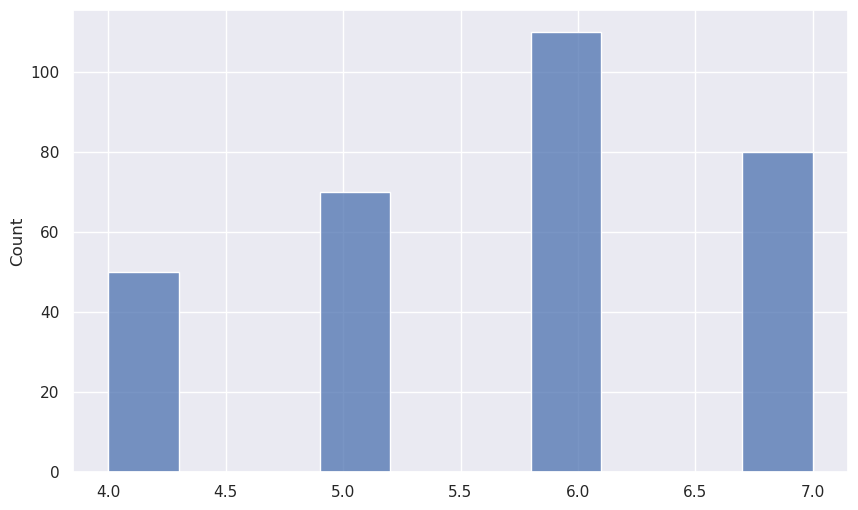

In [7]:


go_id_to_level_all = get_go_id_to_level(
    go_terms_list=df_uniprot_goa.go_id_ancestor, root_node="GO:0003674"
)
protein_to_levels = defaultdict(list)
protein_to_levels_36 = defaultdict(list)
for go_id, protein_set in go_id_to_proteins.items():
    level = go_id_to_level_all[go_id]
    for protein in protein_set:
        protein_to_levels[protein].append(level)
        if go_id in subset_before:
            protein_to_levels_36[protein].append(level)



levels_proteins = [max(levels)for protein, levels in protein_to_levels.items()]
levels_proteins_36 = [max(levels)for protein, levels in protein_to_levels_36.items()]

sns.histplot(levels_proteins)
plt.show()

sns.histplot(levels_proteins_36)
plt.show()

Creating plots of coverage vs. other scores at different values of min_unique_samples_per_term:

In [8]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid

def save_params(
    df_uniprot_goa,
    df_sequences,
    **kwargs
):
    # wrapper method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(
        df_uniprot_goa,
        df_sequences,
        **kwargs
    )
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])
    

param_grid = {
    "prefer_abstract_terms": [True, False],
    "min_unique_samples_per_term": [5, 10, 15, 20],
    "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
}

res = Parallel(n_jobs=-1, backend="multiprocessing")(
    delayed(save_params)(
        df_uniprot_goa=df_uniprot_goa,
        df_sequences=df_sequences,
        min_samples_per_term=20,
        epsilon_f1=0.0,
        nan_value=-1.0,
        verbose=False,
        excluded_terms=None,
        random_seed=1,
        return_scores=True,
        return_baseline_scores=False,
        **parameter_set
    )
    for parameter_set in ParameterGrid(param_grid=param_grid)
)
df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
df_plot.head()


,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,1.0,5,True,1.0,0.816143,0.893333,0.168306,6.0,13.0
1,20,0.0,-1.0,False,None,1,True,False,1.0,5,False,1.0,0.816143,0.893333,0.168306,6.0,13.0
2,20,0.0,-1.0,False,None,1,True,False,1.0,10,True,1.0,0.816195,0.88807,0.168996,8.0,13.0
3,20,0.0,-1.0,False,None,1,True,False,1.0,10,False,1.0,0.816195,0.88807,0.168996,8.0,13.0
4,20,0.0,-1.0,False,None,1,True,False,1.0,15,True,1.0,0.821348,0.886977,0.154405,24.0,14.0


Ignoring prefer_abstract_terms for now (did not have impact on plot):

In [9]:
df_plot_concrete = df_plot[df_plot.prefer_abstract_terms == False]

Plot 1: Coverage vs number of nans vs min unique samples

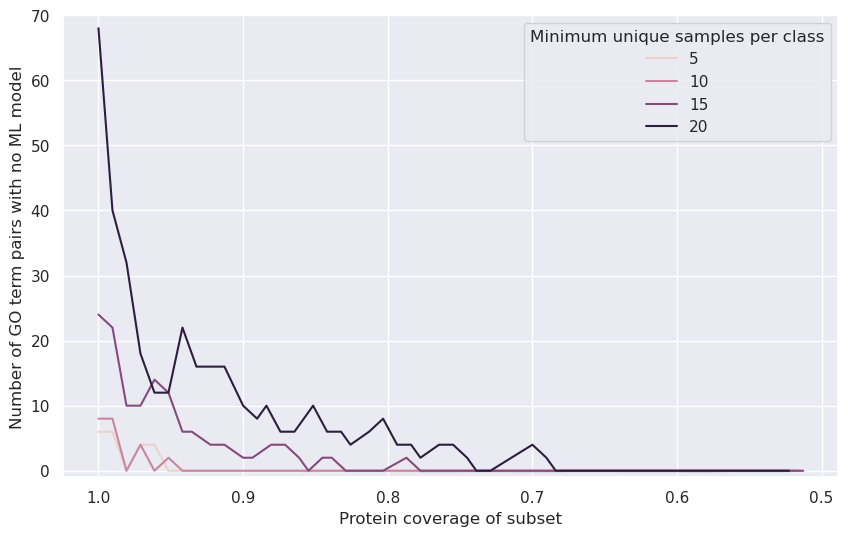

In [10]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="nans", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_ylim((-1,df_plot.nans.max()+2))
g.set_ylabel("Number of GO term pairs with no ML model")
g.set_xlabel("Protein coverage of subset")
g.legend(title="Minimum unique samples per class")
plt.savefig("nans_yeast.png", dpi=300)

Coverage vs. mean F1 score

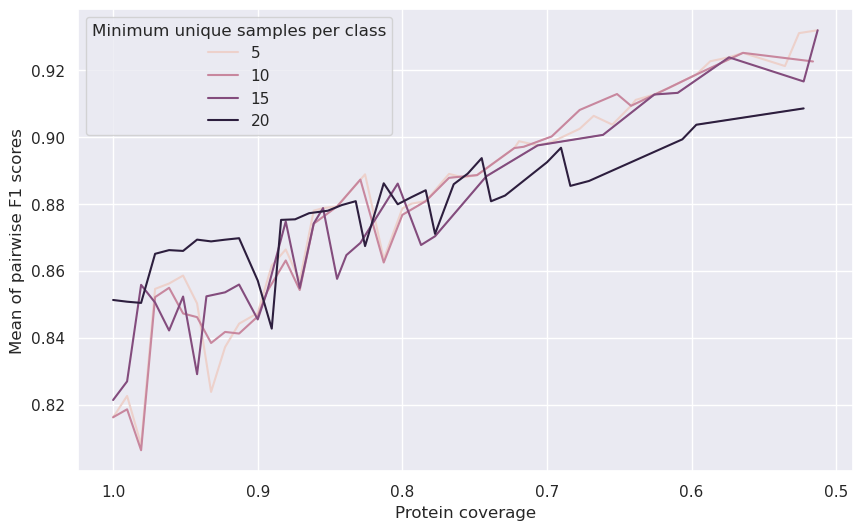

In [11]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="mean", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Mean of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("mean_yeast.png", dpi=300)


Coverage vs median f1 score

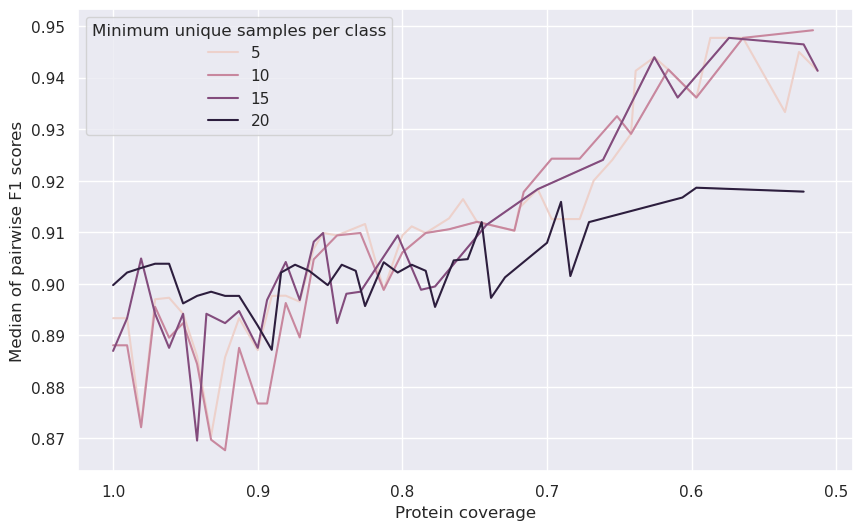

In [12]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="median", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Median of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("median_yeast.png", dpi=300)

# g.set_ylim((0,1))

Coverage vs. subset length vs min_unique_samples

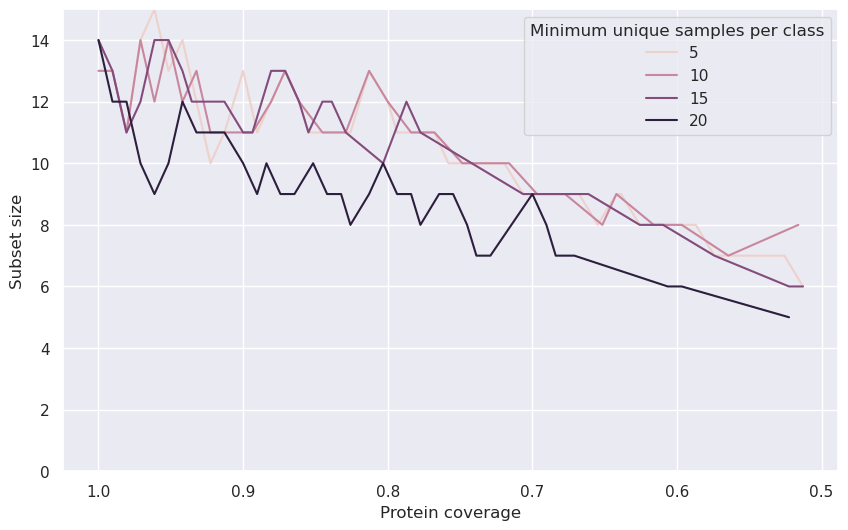

In [13]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="subset_length", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_ylim((0,df_plot["subset_length"].max()))
g.set_xlabel("Protein coverage")
g.set_ylabel("Subset size")
g.legend(title="Minimum unique samples per class")
plt.savefig("subset_size_yeast.png", dpi=300)

Best subset based on plots, mentioned in paper:

In [14]:
# The optimal subset:
display(df_plot_concrete[(df_plot_concrete.min_unique_samples_per_term == 10) &(df_plot_concrete.min_coverage == 0.98)].sort_values("coverage", ascending=False))
best_subset, best_subset_scores = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    epsilon_f1=0.0,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    prefer_abstract_terms=False    
)


go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

# sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset])

tmp = pd.DataFrame.from_records(
    sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset]),
    columns=["GO term", "Proteins"]
).set_index("GO term")
display(tmp)
print(tmp.to_latex())

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
19,20,0.0,-1.0,False,None,1,True,False,0.98,10,False,0.980645,0.806333,0.872172,0.163179,0.0,11.0


,Proteins
GO term,
amide transmembrane transporter activity,21
carbohydrate derivative transmembrane transporter activity,25
carboxylic acid transmembrane transporter activity,64
monoatomic cation transmembrane transporter activity,131
organophosphate ester transmembrane transporter activity,22
passive transmembrane transporter activity,32
primary active transmembrane transporter activity,61
protein transmembrane transporter activity,21
salt transmembrane transporter activity,72


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
amide transmembrane transporter activity & 21 \\
carbohydrate derivative transmembrane transporter activity & 25 \\
carboxylic acid transmembrane transporter activity & 64 \\
monoatomic cation transmembrane transporter activity & 131 \\
organophosphate ester transmembrane transporter activity & 22 \\
passive transmembrane transporter activity & 32 \\
primary active transmembrane transporter activity & 61 \\
protein transmembrane transporter activity & 21 \\
salt transmembrane transporter activity & 72 \\
secondary active transmembrane transporter activity & 80 \\
sulfur compound transmembrane transporter activity & 21 \\
\bottomrule
\end{tabular}



In [15]:
import numpy as np
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)

def get_overlap_plot(subset,df_go_overlaps=df_go_overlaps, filename=None):
    # the percentage of proteins annotated with GO term 1 (x axis) that is also annotated with GO term2
    best_subset_overlaps = df_go_overlaps.loc[subset, subset].rename(
        columns=go_id_to_term, index=go_id_to_term
    )
    best_subset_overlaps = best_subset_overlaps.loc[
        sorted(best_subset_overlaps.index), sorted(best_subset_overlaps.columns)
    ]

    best_subset_overlaps = best_subset_overlaps / np.diag(best_subset_overlaps)

    tmp = best_subset_overlaps.copy()
    np.fill_diagonal(tmp.values, 0)
    print("median", tmp.median(axis=None).round(2))
    print("mean", tmp.mean(axis=None).round(2))

    g = sns.heatmap(best_subset_overlaps, annot=True, fmt=".2f")
    g.set_xlabel("GO term 1")
    g.set_ylabel("GO term 2")
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    return g

median 0.07
mean 0.12


<Axes: xlabel='GO term 1', ylabel='GO term 2'>

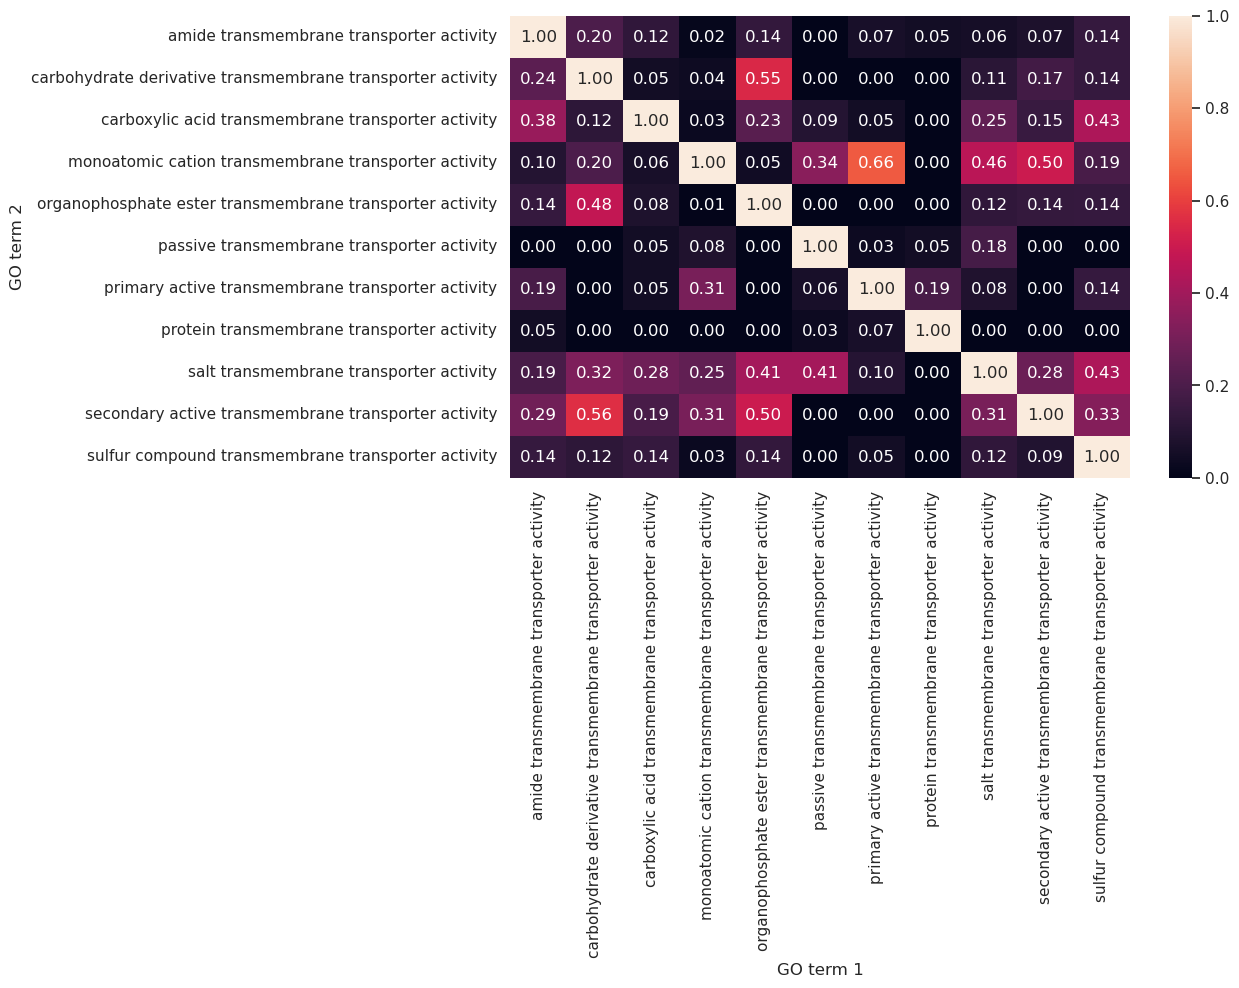

In [16]:
get_overlap_plot(best_subset, filename="overlaps-concrete-yeast.png")

The same parameters, but preferring abstract terms:

In [17]:
# The optimal subset when preferring abstract terms: TODO other result?
best_subset_abstract, best_subset_scores_abstract = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    epsilon_f1=0.0,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    prefer_abstract_terms=True    
)

sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset_abstract])

[('amide transmembrane transporter activity', 21),
 ('carbohydrate derivative transmembrane transporter activity', 25),
 ('carboxylic acid transmembrane transporter activity', 64),
 ('monoatomic cation transmembrane transporter activity', 131),
 ('organophosphate ester transmembrane transporter activity', 22),
 ('passive transmembrane transporter activity', 32),
 ('primary active transmembrane transporter activity', 61),
 ('protein transmembrane transporter activity', 21),
 ('salt transmembrane transporter activity', 72),
 ('secondary active transmembrane transporter activity', 80),
 ('sulfur compound transmembrane transporter activity', 21)]

No difference.

What about the other parameters? Can optimizing all other parameters (except min_coverage) improve results?

In [18]:
# generating results for parameter combinations:
param_grid = {
    "epsilon_f1": [0.0, 0.001, 0.005, 0.01],
    "random_seed": list(range(1, 10)),
    "prefer_abstract_terms": [True, False],
    # "min_unique_samples_per_term": [5, 10, 15, 20],
    "nan_value": [-1,0],
    "min_coverage": [1.0, 0.99, 0.98],
}
res = Parallel(n_jobs=-3, backend="multiprocessing")(
    delayed(save_params)(
        df_uniprot_goa=df_uniprot_goa,
        df_sequences=df_sequences,
        min_samples_per_term=20,
        min_unique_samples_per_term=10,
        verbose=False,
        excluded_terms=None,
        return_scores=True,
        return_baseline_scores=False,
        **parameter_set
    )
    for parameter_set in ParameterGrid(param_grid=param_grid)
)
df_random = pd.concat(res, axis=1).T.reset_index(drop=True)
df_random_nonan = df_random[(df_random.nans == 0)]
df_random_nonan_abstract = df_random_nonan[df_random_nonan.prefer_abstract_terms == True]
df_random_nonan_concrete = df_random_nonan[df_random_nonan.prefer_abstract_terms == False]

In [19]:
df_random_nonan.groupby(["prefer_abstract_terms", "epsilon_f1"]).mean()

min_samples_per_term  \
prefer_abstract_terms epsilon_f1                        
False                 0.000                      20.0   
                      0.001                      20.0   
                      0.005                      20.0   
                      0.010                      20.0   
True                  0.000                      20.0   
                      0.001                      20.0   
                      0.005                      20.0   
                      0.010                      20.0   

                                 min_unique_samples_per_term verbose  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                             10.0     0.0   
                      0.001                             10.0     0.0   
                      0.005                             10.0     0.0   
                      0.010                             10.0     0.0   
True                  0.000                             10.0     0.0   
                      0.001                             10.0     0.0   
                      0.005                             10.0     0.0   
                      0.010                             10.0     0.0   

                                 excluded_terms return_scores  \
prefer_abstract_terms epsilon_f1                                
False                 0.000                 NaN           1.0   
                      0.001                 NaN           1.0   
                      0.005                 NaN           1.0   
                      0.010                 NaN           1.0   
True                  0.000                 NaN           1.0   
                      0.001                 NaN           1.0   
                      0.005                 NaN           1.0   
                      0.010                 NaN           1.0   

                                 return_baseline_scores min_coverage  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                         0.0         0.98   
                      0.001                         0.0         0.98   
                      0.005                         0.0         0.98   
                      0.010                         0.0         0.98   
True                  0.000                         0.0         0.98   
                      0.001                         0.0         0.98   
                      0.005                         0.0     0.984375   
                      0.010                         0.0     0.983636   

                                 nan_value random_seed  coverage      mean  \
prefer_abstract_terms epsilon_f1                                             
False                 0.000           -1.0         5.0  0.980645  0.806333   
                      0.001           -0.5         5.0  0.980645   0.80632   
                      0.005        -0.5625       5.375  0.980645   0.80609   
                      0.010           -0.5         5.0  0.980645   0.80609   
True                  0.000           -1.0         5.0  0.980645  0.806333   
                      0.001           -1.0         5.0  0.980645   0.80413   
                      0.005        -0.9375      5.0625  0.984879  0.801647   
                      0.010      -0.909091    4.909091  0.984164  0.802066   

                                    median       std nans subset_length  
prefer_abstract_terms epsilon_f1                                         
False                 0.000       0.872172  0.163179  0.0          11.0  
                      0.001       0.872172  0.163168  0.0          11.0  
                      0.005       0.872172  0.162979  0.0          11.0  
                      0.010       0.872172  0.162979  0.0          11.0  
True                  0.000       0.872172  0.163179  0.0          11.0  
                      0.001        0.86172  0.168157  0.0          11.

In [20]:
df_random_nonan.groupby(["prefer_abstract_terms", "epsilon_f1"]).max()

min_samples_per_term  \
prefer_abstract_terms epsilon_f1                        
False                 0.000                        20   
                      0.001                        20   
                      0.005                        20   
                      0.010                        20   
True                  0.000                        20   
                      0.001                        20   
                      0.005                        20   
                      0.010                        20   

                                 min_unique_samples_per_term verbose  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                               10   False   
                      0.001                               10   False   
                      0.005                               10   False   
                      0.010                               10   False   
True                  0.000                               10   False   
                      0.001                               10   False   
                      0.005                               10   False   
                      0.010                               10   False   

                                 excluded_terms return_scores  \
prefer_abstract_terms epsilon_f1                                
False                 0.000                 NaN          True   
                      0.001                 NaN          True   
                      0.005                 NaN          True   
                      0.010                 NaN          True   
True                  0.000                 NaN          True   
                      0.001                 NaN          True   
                      0.005                 NaN          True   
                      0.010                 NaN          True   

                                 return_baseline_scores min_coverage  \
prefer_abstract_terms epsilon_f1                                       
False                 0.000                       False         0.98   
                      0.001                       False         0.98   
                      0.005                       False         0.98   
                      0.010                       False         0.98   
True                  0.000                       False         0.98   
                      0.001                       False         0.98   
                      0.005                       False         0.99   
                      0.010                       False         0.99   

                                 nan_value random_seed  coverage      mean  \
prefer_abstract_terms epsilon_f1                                             
False                 0.000             -1           9  0.980645  0.806333   
                      0.001              0           9  0.980645  0.806333   
                      0.005              0           9  0.980645   0.80609   
                      0.010              0           9  0.980645   0.80609   
True                  0.000             -1           9  0.980645  0.806333   
                      0.001             -1           9  0.980645   0.80413   
                      0.005              0           9  0.990323   0.80413   
                      0.010              0           9  0.990323   0.80413   

                                    median       std nans subset_length  
prefer_abstract_terms epsilon_f1                                         
False                 0.000       0.872172  0.163179  0.0          11.0  
                      0.001       0.872172  0.163179  0.0          11.0  
                      0.005       0.872172  0.162979  0.0          11.0  
                      0.010       0.872172  0.162979  0.0          11.0  
True                  0.000       0.872172  0.163179  0.0          11.0  
                      0.001        0.86172  0.168157  0.0          11.

variance between random seeds

In [21]:
df_random_nonan[
    ["random_seed", "coverage", "mean", "median", "std", "subset_length"]
].groupby("random_seed").mean()

,coverage,mean,median,std,subset_length
random_seed,,,,,
1,0.981525,0.80495,0.869451,0.166399,11.0
2,0.98139,0.804975,0.869066,0.166271,11.0
3,0.980645,0.805599,0.869036,0.164613,11.0
4,0.982258,0.804572,0.870668,0.167455,11.0
5,0.981525,0.805128,0.870401,0.165928,11.0
6,0.982134,0.804519,0.869979,0.167494,11.0
7,0.981452,0.805045,0.869678,0.166114,11.0
8,0.981452,0.805045,0.869678,0.166114,11.0
9,0.982258,0.804572,0.870668,0.167455,11.0


variance between abstract, non-abstract

In [22]:
df_random_nonan[
    ["prefer_abstract_terms", "coverage", "mean", "median", "std", "nans", "subset_length"]
].groupby("prefer_abstract_terms").mean()

,coverage,mean,median,std,nans,subset_length
prefer_abstract_terms,,,,,,
False,0.980645,0.806194,0.872172,0.163064,0.0,11.0
True,0.983011,0.803183,0.866714,0.171098,0.0,11.0


maximum:

In [23]:
df_random_nonan[
    ["prefer_abstract_terms", "coverage", "mean", "median", "std", "nans", "subset_length"]
].groupby("prefer_abstract_terms").max()

,coverage,mean,median,std,nans,subset_length
prefer_abstract_terms,,,,,,
False,0.980645,0.806333,0.872172,0.163179,0.0,11.0
True,0.990323,0.806333,0.8736,0.184259,0.0,11.0


Which subset has the higher coverage?

{'min_samples_per_term': 20,
 'min_unique_samples_per_term': 10,
 'verbose': False,
 'excluded_terms': None,
 'return_scores': True,
 'return_baseline_scores': False,
 'epsilon_f1': 0.005,
 'min_coverage': 0.99,
 'nan_value': -1,
 'prefer_abstract_terms': True,
 'random_seed': 1}

coverage          0.990323
mean              0.798454
median            0.873600
std               0.184259
nans              0.000000
subset_length    11.000000
dtype: float64


,GO term,Proteins
0,amide transmembrane transporter activity,21
1,carbohydrate derivative transmembrane transpor...,25
2,inorganic molecular entity transmembrane trans...,158
3,macromolecule transmembrane transporter activity,21
4,monoatomic ion transmembrane transporter activity,142
5,organic acid transmembrane transporter activity,65
6,organophosphate ester transmembrane transporte...,22
7,primary active transmembrane transporter activity,61
8,salt transmembrane transporter activity,72
9,secondary active transmembrane transporter act...,80


\begin{tabular}{lr}
\toprule
 & Proteins \\
GO term &  \\
\midrule
amide transmembrane transporter activity & 21 \\
carbohydrate derivative transmembrane transporter activity & 25 \\
inorganic molecular entity transmembrane transporter activity & 158 \\
macromolecule transmembrane transporter activity & 21 \\
monoatomic ion transmembrane transporter activity & 142 \\
organic acid transmembrane transporter activity & 65 \\
organophosphate ester transmembrane transporter activity & 22 \\
primary active transmembrane transporter activity & 61 \\
salt transmembrane transporter activity & 72 \\
secondary active transmembrane transporter activity & 80 \\
sulfur compound transmembrane transporter activity & 21 \\
\bottomrule
\end{tabular}

median 0.1
mean 0.16


<Axes: xlabel='GO term 1', ylabel='GO term 2'>

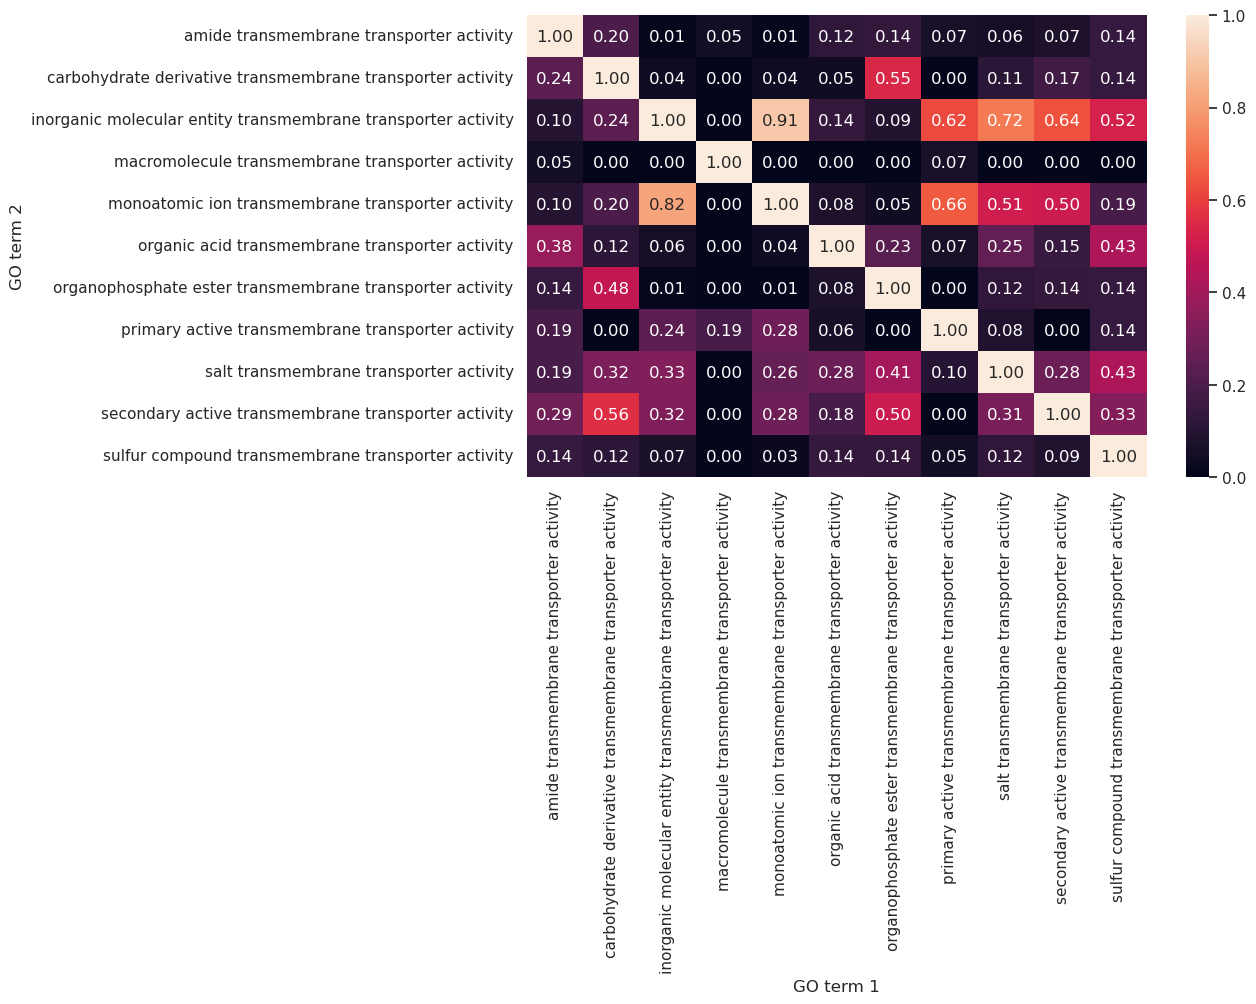

In [24]:
params = df_random_nonan_abstract[df_random_nonan_abstract.coverage == df_random_nonan_abstract.coverage.max()].iloc[0, :11].to_dict()
display(params)
subset_higher_coverage, subset_higher_coverage_scores = subset_pipeline(df_uniprot_goa, df_sequences, **params)

tmp = pd.DataFrame.from_records(
    sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in subset_higher_coverage]),
    columns=["GO term", "Proteins"]
)

print(subset_higher_coverage_scores)
display(tmp)

print(tmp.set_index("GO term").to_latex())

get_overlap_plot(subset_higher_coverage, filename="overlaps-abstract-yeast.png")

variances epsilon

In [25]:
df_random_nonan[
    ["epsilon_f1", "coverage", "mean", "median", "std", "nans", "subset_length"]
].groupby("epsilon_f1").mean()

,coverage,mean,median,std,nans,subset_length
epsilon_f1,,,,,,
0.000,0.980645,0.806333,0.872172,0.163179,0.0,11.0
0.001,0.980645,0.80559,0.868688,0.164831,0.0,11.0
0.005,0.982762,0.803869,0.869544,0.16909,0.0,11.0
0.010,0.98198,0.804564,0.869846,0.167164,0.0,11.0


correlations

In [26]:
df_random_nonan.drop(
    [
        "min_samples_per_term",
        "min_unique_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "nans"
    ], axis=1
).corr("kendall").round(2)

,epsilon_f1,min_coverage,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,subset_length
epsilon_f1,1.00,0.20,0.17,-0.02,0.00,0.20,-0.49,0.01,-0.10,NaN
min_coverage,0.20,1.00,-0.13,0.40,0.05,1.00,-0.51,0.61,0.51,NaN
nan_value,0.17,-0.13,1.00,-0.41,0.00,-0.13,0.15,0.15,-0.36,NaN
prefer_abstract_terms,-0.02,0.40,-0.41,1.00,-0.02,0.40,-0.57,-0.31,0.76,NaN
random_seed,0.00,0.05,0.00,-0.02,1.00,0.05,-0.01,0.07,-0.01,NaN
coverage,0.20,1.00,-0.13,0.40,0.05,1.00,-0.51,0.61,0.51,NaN
mean,-0.49,-0.51,0.15,-0.57,-0.01,-0.51,1.00,0.21,-0.39,NaN
median,0.01,0.61,0.15,-0.31,0.07,0.61,0.21,1.00,-0.21,NaN
std,-0.10,0.51,-0.36,0.76,-0.01,0.51,-0.39,-0.21,1.00,NaN
subset_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
